In [1]:
import obspy as op
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import tensorflow as tf
import model_V1
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')

print (tf.config.list_physical_devices())
print (tf.__version__)
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  #Invalid device or cannot modify virtual devices once initialized.
  pass

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.5.0


# Training Autoencoder

In [2]:
###loading data
os.chdir('/home/rick/HDD_16T_a/SapWorkdir/DEC/FinalCode')
from sklearn.model_selection import train_test_split

x_train = np.load('x_power_boxcox.npy',mmap_mode='r')
y_train = np.load('y_power_boxcox.npy',allow_pickle=True)
print (x_train.shape)

###make noisy data
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.2
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=3.0, size=array.shape
    )

    return noisy_array
x_train_noisy = noise(x_train)



###building model
encoder,decoder,autoencoder = model_V1.CAE(input_shape=(128, 128, 3), set_seed=[False,42],filters=[12, 24, 36, 48, 64],summary=True)
                            
###training 
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(x_train_noisy,x_train,batch_size=256,epochs=200)


WeightsFileName =  ['Pretrain_encoder.h5','Pretrain_autoencoder.h5','Pretrain_decoder.h5']
encoder.save_weights(WeightsFileName[0])
autoencoder.save_weights(WeightsFileName[1])
decoder.save_weights(WeightsFileName[2])

(47049, 128, 128, 3)
Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 64, 64, 12)        336       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 24)        2616      
_________________________________________________________________
Conv_3 (Conv2D)              (None, 16, 16, 36)        7812      
_________________________________________________________________
Conv_4 (Conv2D)              (None, 8, 8, 48)          15600     
_________________________________________________________________
Flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
encoded (Dense)              (None

184/184 [==============================] - 7s 38ms/step - loss: 0.1620
Epoch 44/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1619
Epoch 45/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1617
Epoch 46/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1617
Epoch 47/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1616
Epoch 48/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1615
Epoch 49/200
184/184 [==============================] - 7s 37ms/step - loss: 0.1614
Epoch 50/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1614
Epoch 51/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1612
Epoch 52/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1611
Epoch 53/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1611
Epoch 54/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1610
Epoch

184/184 [==============================] - 7s 38ms/step - loss: 0.1581
Epoch 141/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1581
Epoch 142/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 143/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1581
Epoch 144/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 145/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 146/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 147/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 148/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 149/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1579
Epoch 150/200
184/184 [==============================] - 7s 38ms/step - loss: 0.1580
Epoch 151/200
184/184 [==============================] - 7s 38ms/step - loss: 0

# Evalutation

(49152,)
dist1 mean: 0.0 std dev: 1.0
 max: 4.189924716949463 min: -3.241346836090088


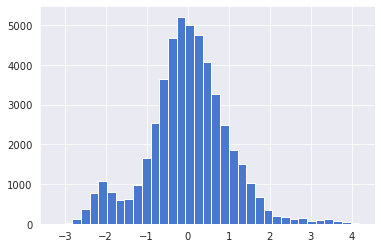

In [3]:
# Loading data
os.chdir('/home/rick/HDD_16T_a/SapWorkdir/DEC/FinalCode')

x_train = np.load('x_power_boxcox.npy',mmap_mode='r')
info = np.load('y_power_boxcox.npy',allow_pickle=True)
y_train = info[...,3]
y_true =  np.ndarray(shape=(len(y_train)) ,dtype = 'float32')
for i,data in enumerate(y_train):
    #print (i,data)
    if data == "EQ" :
        y_true[i] = np.array(1)
    elif data == "RF":
        y_true[i] = np.array(2)
    elif data == "EN":
        y_true[i] = np.array(3)
    elif data == "car":
        y_true[i] = np.array(4)
    else :
        y_true[i] = np.array(0)

z = (x_train[0][...])
z = z.reshape(128*128*3)
print (z.shape)
print(f'dist1 mean: {np.mean(z)} std dev: {np.std(z)}\n max: {np.max(z)} min: {np.min(z)}')
plt.hist(z, bins = 35)
plt.show()
del z

In [4]:
### Save and load weights
###building model
encoder,decoder,autoencoder = model_V1.CAE(input_shape=(128, 128, 3), set_seed=[False,42],filters=[12, 24, 36, 48, 64],summary=True)
os.chdir('/home/rick/HDD_16T_a/SapWorkdir/DEC/FinalCode')
DEC_weightsdir = '/home/rick/HDD_16T_a/SapWorkdir/DEC/FinalCode/weights_1_1_iter3e4'
WeightsFileName = ['Pretrain_encoder.h5','Pretrain_autoencoder.h5','Pretrain_decoder.h5']
encoder.load_weights(WeightsFileName[0])
autoencoder.load_weights(WeightsFileName[1])
decoder.load_weights(WeightsFileName[2])

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 64, 64, 12)        336       
_________________________________________________________________
Conv_2 (Conv2D)              (None, 32, 32, 24)        2616      
_________________________________________________________________
Conv_3 (Conv2D)              (None, 16, 16, 36)        7812      
_________________________________________________________________
Conv_4 (Conv2D)              (None, 8, 8, 48)          15600     
_________________________________________________________________
Flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
encoded (Dense)              (None, 64)                

In [5]:
autoencoded_imgs = autoencoder.predict(x_train[0:100])
features = encoder.predict(x_train)
print('feature shape=', features.shape)

feature shape= (47049, 64)


## Number of clusters,K

In [7]:
import metrics
metrics_list_pretrain = []
features = encoder.predict(x_train)
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=20).fit(features)
    y_pred = kmeans.predict(features)
    truelist,predlist,predlist_km = metrics.tracker(y_train,y_pred,n_clusters=i)
    ClusteringAccuracy = metrics.accuracy_score(truelist,predlist)
    y_pred_last = y_pred
    nmi = metrics.nmi(truelist,predlist_km)
    ari = metrics.ari(truelist,predlist_km)
    purity = metrics.purity_score(truelist,predlist_km)
    print ("Clustering Accuracy : ",ClusteringAccuracy)
    print('nmi={0},ari={1},purity={2}'.format(nmi,ari,purity))
    metric=[i,ClusteringAccuracy,nmi,ari,purity]
    metrics_list_pretrain.append(metric)
    del y_pred
print (metrics_list_pretrain)

in cluster0 : EQnum=17,RFnum=491,ENnum=531,carnum=346
clster0->ENclass
in cluster1 : EQnum=521,RFnum=33,ENnum=7,carnum=5
clster1->EQclass
Clustering Accuracy :  0.539210661199
nmi=0.4739163430826762,ari=0.32989955344043537,purity=0.5392106611993849
in cluster0 : EQnum=11,RFnum=287,ENnum=536,carnum=248
clster0->ENclass
in cluster1 : EQnum=523,RFnum=22,ENnum=2,carnum=0
clster1->EQclass
in cluster2 : EQnum=4,RFnum=215,ENnum=0,carnum=103
clster2->RFclass
Clustering Accuracy :  0.652998462327
nmi=0.5126536531921063,ari=0.41071775253966186,purity=0.6529984623270118
in cluster0 : EQnum=113,RFnum=366,ENnum=7,carnum=248
clster0->RFclass
in cluster1 : EQnum=0,RFnum=149,ENnum=0,carnum=103
clster1->RFclass
in cluster2 : EQnum=0,RFnum=0,ENnum=530,carnum=0
clster2->ENclass
in cluster3 : EQnum=425,RFnum=9,ENnum=1,carnum=0
clster3->EQclass
Clustering Accuracy :  0.753459764223
nmi=0.6425544071125054,ari=0.5699327899354893,purity=0.7534597642234752
in cluster0 : EQnum=1,RFnum=292,ENnum=7,carnum=258
cls

No handles with labels found to put in legend.


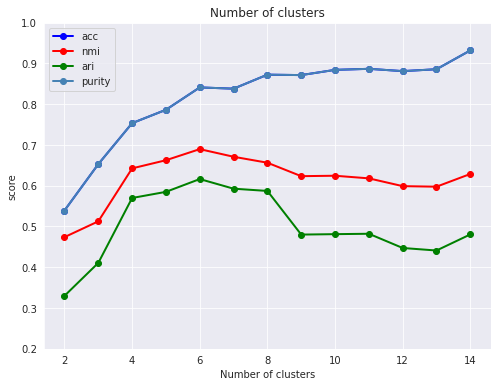

In [15]:
plt.figure(figsize=(8,6))
acc = [i[1] for i in metrics_list_pretrain]
nmi = [i[2] for i in metrics_list_pretrain]
ari = [i[3] for i in metrics_list_pretrain]
purity = [i[4] for i in metrics_list_pretrain]
clusters = [i[0] for i in metrics_list_pretrain]

plt.plot(clusters, acc,'o-' , color='blue', linewidth=2)
plt.plot(clusters, nmi,'o-',  color='red', linewidth=2)
plt.plot(clusters, ari,'o-',  color='g', linewidth=2)
plt.plot(clusters , purity,'o-', color='steelblue' , linewidth=2)


plt.title('Number of clusters')
plt.legend()
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.legend(["acc","nmi","ari","purity"])
plt.ylim([0.2, 1.0])
plt.yticks()
plt.show()

In [16]:
### initializing the weights using Kmean and assigning them to the model
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters,random_state=87).fit(features)
y_pred = kmeans.fit_predict(features)
y_pred_last = np.copy(y_pred)

In [17]:
# 使用 t-SNE 對 `encodedConv2D_imgs` 資料降維
centers = kmeans.cluster_centers_
reconstruction_centers = decoder.predict(centers)
enc_cen = np.append(features,centers,axis=0)
redu = TSNE(n_components=2, perplexity=30, random_state=87).fit_transform(enc_cen)

/home/rick/anaconda3/envs/tf-2.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/rick/anaconda3/envs/tf-2.5/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


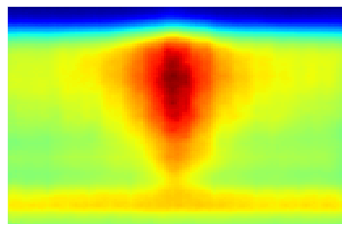

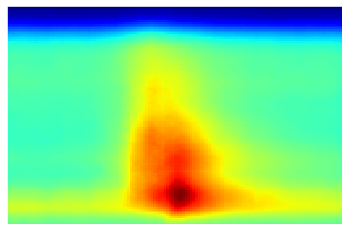

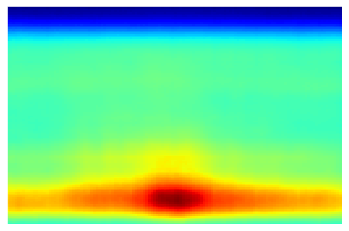

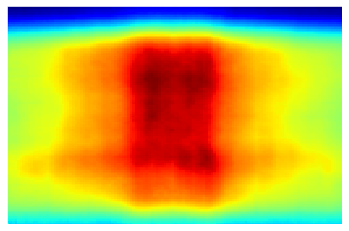

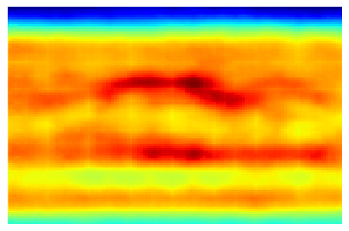

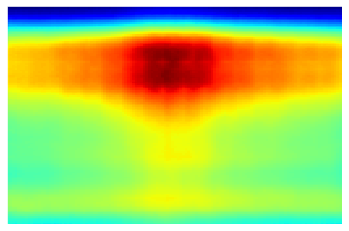

In [18]:
for i,n in enumerate(reconstruction_centers):
    Sxx = reconstruction_centers[i][...,0]
    plt.pcolormesh(Sxx ,cmap='jet')
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    num = str(i)
    #plt.savefig("/home/rtx3090-1/Desktop/Final File/image/Pre-train reconstruction centers_"+num+"_"+today+".jpg",bbox_inches='tight', transparent=False) 
    plt.show()
    plt.close()

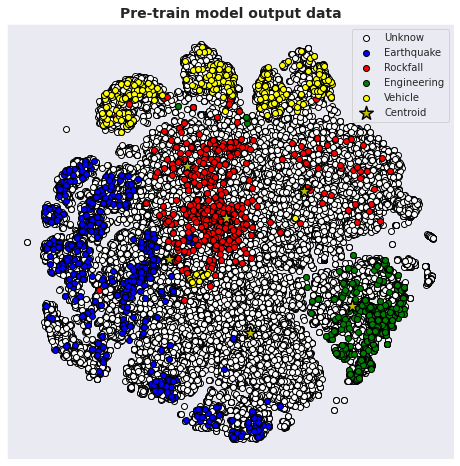

In [19]:
# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
cen = int(len(reconstruction_centers))
# 調整圖形的外觀
colors = ['white', 'blue', 'red','green','yellow']
for i in range(len(colors)):
    x = redu[:-cen, 0][y_true == i] #y_pred
    y = redu[:-cen, 1][y_true == i] #y_pred
    ax.scatter(x, y, c=colors[i] ,marker='o', edgecolors='black')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title('encoded_tsne')
#centers
x1 = redu[-cen:, 0] 
y1 = redu[-cen:, 1]
ax.scatter(x1, y1,s=200, alpha=1, linewidths=1.5, c='y' ,marker='*', edgecolors='black')    
plt.grid()
plt.legend(['Unknow','Earthquake','Rockfall','Engineering','Vehicle','Centroid'])
plt.title("Pre-train model output data", fontsize=14, fontweight='bold')
plt.show()
#fig.savefig(DEC_weightsdir +"/pretrain_model_output.jpg",dpi=1080,bbox_inches='tight', transparent=False) 

plt.close(fig)

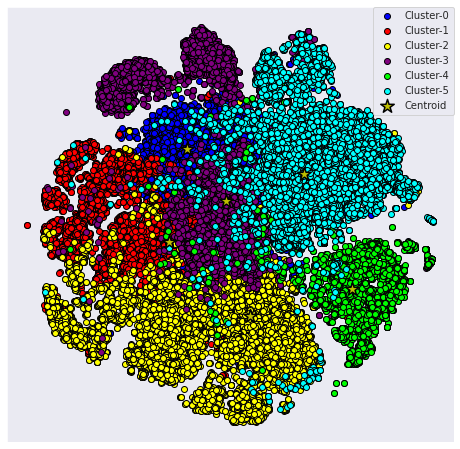

In [20]:
# 在 1x2 的網格上繪製子圖形
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
num = []
for i in range(cen):
    classnum=('Cluster-'+str(i))
    num.append(classnum)
num.append('Centroid')
# 調整圖形的外觀
colors = ['blue', 'red', 'yellow', 'purple', 'lime', 'cyan']
for i in range(len(colors)):
    x = redu[:-cen , 0][y_pred_last == i] #y_pred
    y = redu[:-cen , 1][y_pred_last == i] #y_pred

    ax.scatter(x, y, c=colors[i] ,marker='o', edgecolors='black')
    #ax.set_title('encoded_tsne')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#centers
x0 = redu[-cen :, 0] 
y0 = redu[-cen :, 1]
ax.scatter(x0, y0,s=200, alpha=1, linewidths=1.5, c='y' ,marker='*', edgecolors='black')    
plt.legend(num, borderaxespad=0.)
plt.show()
#fig.savefig(DEC_weightsdir +"/pretrain_model_output_2.jpg",dpi=1080,bbox_inches='tight', transparent=False) 

plt.close(fig)

in cluster0 : EQnum=2,RFnum=230,ENnum=1,carnum=3
clster0->RFclass
in cluster1 : EQnum=345,RFnum=22,ENnum=0,carnum=0
clster1->EQclass
in cluster2 : EQnum=191,RFnum=6,ENnum=1,carnum=0
clster2->EQclass
in cluster3 : EQnum=0,RFnum=209,ENnum=8,carnum=255
clster3->ENclass
in cluster4 : EQnum=0,RFnum=0,ENnum=528,carnum=0
clster4->ENclass
in cluster5 : EQnum=0,RFnum=57,ENnum=0,carnum=93
clster5->ENclass


Text(91.68, 0.5, 'predicted label')

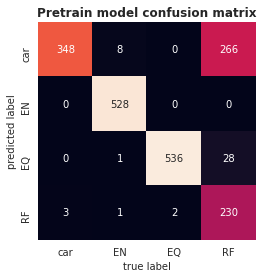

In [21]:
import metrics

truelist,predlist,predlist_km = metrics.tracker(y_train,y_pred_last,n_clusters=n_clusters)
mat = confusion_matrix(truelist,predlist)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['car','EN','EQ','RF'], yticklabels=['car','EN','EQ','RF']
            )
plt.title("Pretrain model confusion matrix", fontsize=12, fontweight='bold')
plt.xlabel('true label')
plt.ylabel('predicted label')
#plt.savefig(DEC_weightsdir+"/Pretrain model confusion matrix.jpg",bbox_inches='tight', transparent=False) 

In [22]:
print('nmi=', metrics.nmi(truelist,predlist_km), 'ari=', metrics.ari(truelist,predlist_km))
Purity = []
purity = metrics.purity_score(truelist,predlist_km)
print ("Purity : ", purity)
Purity.append(purity)

nmi= 0.690614247947 ari= 0.617118586929
Purity :  0.841619682214


# model preformance

[5698, 7182, 12600, 6903, 3733, 10933]


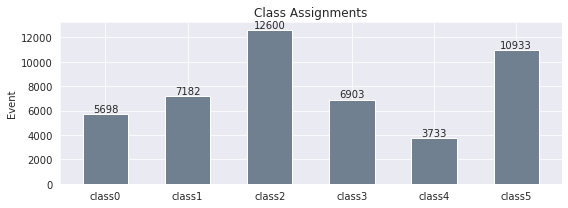

In [23]:
cen = int(len(reconstruction_centers))
classes = []
num = []
for i in range(cen):
    classnum=('class'+str(i))
    classx = np.sum(y_pred_last==i)
    num.append(classx)
    classes.append(classnum)
print (num)
fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(classes, num, tick_label=classes, width=0.55, color='slategray')
ax.set_title('Class Assignments')        
#ax.set_xlabel('Class')                             
ax.set_ylabel('Event')
rect = ax.patches
for rect, num  in zip(rect, num ):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, num,
            ha='center', va='bottom')
fig.tight_layout()
#plt.savefig("Class Assignments.png",bbox_inches='tight', transparent=False)
plt.show()